<a href="https://www.kaggle.com/code/khushalkarim/titanic-machine-learning-disaster-github-version?scriptVersionId=107327108" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#On 12 April 1912, one of the deadliest disasters happened between Europe and North America. Titanic, also known as a 'Ship of Dreams' sank in the ocean after colliding
#with an iceberg causing the death of 1502 out of 2224 passengers. Unluckily, due to having less number of lifebeats available, many of passengers who were likely to 
#also died. 
#Based on the event happened and neglecting the absence of boats available, the likelyhood of survival was high. Therefore, using the data of all passengers with the 
#given necessary features, through Machine Learning Algorithm, Randomforest, the accuracy is determined with no parameters are tuned. In a layman's terms, which 
#passengers survived and which passengers died needs to be determined

**Importaning Necessary Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Datasets(Including one required file for final submission)**

In [3]:
data=pd.read_csv('../input/titanic/train.csv')
dataa=pd.read_csv('../input/titanic/test.csv')
testID=dataa['PassengerId']

**Deleting features from Training Dataset which does not impact the label**

In [4]:
data.drop(["Cabin", "Name", "PassengerId", "Ticket"], axis=1, inplace=True)

**Checking The Null/ Missing Values In Training Dataset**

In [5]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

**Deleting features from Testing Dataset which does not impact the label**

In [6]:
dataa.drop(["Cabin", "Name", "PassengerId", "Ticket"], axis=1, inplace=True)

**Checking The Null/ Missing Values In Testing Dataset**

In [7]:
dataa.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

**Fill the missing values as mean and mode for 'Age' and 'Embarked' features In Training Dataset respectively**

In [8]:
data['Age']=data['Age'].fillna(data['Age'].mean())
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

**Fill the missing values as mean for 'Age' and 'Fare' features In Testing Dataset**

In [9]:
dataa['Age']=dataa['Age'].fillna(dataa['Age'].mean())
dataa['Fare']=dataa['Fare'].fillna(dataa['Fare'].mean())

**Checking NULL/ Missing Values In Training and Testing Dataset To Ensure No NULL/ Missing Values Are Left**

In [10]:
data.isnull().sum()
dataa.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**Converting Features Into Numerical Form To Make Readable for Machine Learning Algorithms In Training And Testing Dataset**

In [11]:
label_encoder = preprocessing.LabelEncoder()
data['Sex']= label_encoder.fit_transform(data['Sex'])
data['Embarked']= label_encoder.fit_transform(data['Embarked'])
dataa['Sex']= label_encoder.fit_transform(dataa['Sex'])
dataa['Embarked']= label_encoder.fit_transform(dataa['Embarked'])

**Dividing Training Dataset Into X And Y To Train Model**

In [12]:
x=data.drop(("Survived"), axis='columns')
y=data["Survived"]

**Splitting Training Dataset Into Training-Testing Split**

In [13]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=40)

**Training The Model Using Machine Learning Algorithm And Predicting Accuracy on Testing Split**

In [14]:
rfc=RandomForestClassifier(n_estimators=40, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=10, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=16, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
rfc.fit(x_train, y_train)
y_pred=rfc.score(x_test, y_test)

score=rfc.score(x_test, y_test)
print(score*100)

85.47486033519553


**Predicting Performance on Testing Features of Training Dataset**

In [15]:
y_predicted=rfc.predict(x_test)

**Assess The Performance Of Model Using Confusion Matrix And Its Plot**

Text(69.0, 0.5, 'truth')

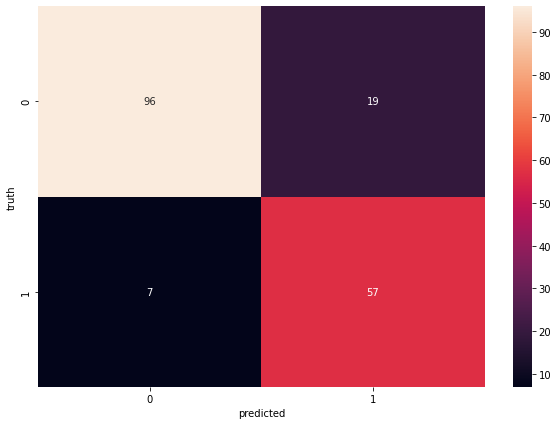

In [16]:
cm=confusion_matrix(y_predicted, y_test)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

**Predicting the performance on Testing Dataset**

In [17]:
submit=rfc.predict(dataa)

**New Required Dataframe To Submit Result Of Testing Dataset**

In [18]:
file=pd.DataFrame({"PassengerId":testID.values,
                   "Survived":submit,
                  })

**Download Submission File on PC**

In [19]:
#file.to_csv("C:/Users/Hp/OneDrive/Desktop/Submissionn.csv", index=False)